# Análise de Dados e Machine Learning - Academia RedFit

In [18]:
import pandas as pd

academia = 'academia_redfit.csv'

df = pd.read_csv(academia)

display(df.head())

,idade,sexo,frequencia_semanal_treino,tipo_atividade,tempo_medio_exercicio,minutos_totais_semana,preco_plano,possui_nutricionista,primeiro_PGC,ultimo_PGC,data_matricula,estado
0,48,Outro,7.0,Natação,45.3,317.1,188.47,Não,39.5,24.9,2021-07-28,Ativa
1,30,Outro,7.0,Yoga,98.1,686.7,198.07,Não,25.2,23.5,2020-12-28,Ativa
2,35,Masculino,5.0,Cardio,33.9,169.5,154.90,Não,27.2,11.4,2022-02-27,Ativa
3,43,Outro,3.0,Yoga,75.6,226.8,250.79,Sim,14.4,19.2,2022-12-01,Ativa
4,37,Masculino,0.0,CrossFit,114.0,0.0,168.02,Sim,21.5,18.1,2024-01-20,Sedentária


#Transformação e Carga dos Dados

In [19]:
df['tipo_atividade'] = df['tipo_atividade'].str.capitalize()

df['data_matricula'] = pd.to_datetime(df['data_matricula'])

def classificar_atividade(freq):
    if freq == 0:
        return 'Sedentário'
    elif 1 <= freq <= 3:
        return 'Ativo'
    else:
        return 'Atleta'

df['nivel_atividade'] = df['frequencia_semanal_treino'].apply(classificar_atividade)

df['evolucao_PGC'] = (df['primeiro_PGC'] - df['ultimo_PGC']).round(2)

print("Dados transformados com sucesso!")
display(df[['tipo_atividade', 'nivel_atividade', 'evolucao_PGC']].head())

Dados transformados com sucesso!


,tipo_atividade,nivel_atividade,evolucao_PGC
0,Natação,Atleta,14.6
1,Yoga,Atleta,1.7
2,Cardio,Atleta,15.8
3,Yoga,Ativo,-4.8
4,Crossfit,Sedentário,3.4


In [20]:
colunas_selecionadas = [
    'idade', 'sexo', 'frequencia_semanal_treino', 'tipo_atividade',
    'tempo_medio_exercicio', 'minutos_totais_semana', 'preco_plano',
    'possui_nutricionista', 'ultimo_PGC', 'data_matricula',
    'evolucao_PGC', 'nivel_atividade'
]

df_limpo = df[colunas_selecionadas]

df_limpo.to_csv('redfit_clientes_limpo.csv', index=False)

print("DataFrame limpo salvo com sucesso como 'redfit_clientes_limpo.csv'")
df_limpo.info()

DataFrame limpo salvo com sucesso como 'redfit_clientes_limpo.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   idade                      1000 non-null   int64         
 1   sexo                       1000 non-null   object        
 2   frequencia_semanal_treino  949 non-null    float64       
 3   tipo_atividade             1000 non-null   object        
 4   tempo_medio_exercicio      954 non-null    float64       
 5   minutos_totais_semana      905 non-null    float64       
 6   preco_plano                1000 non-null   float64       
 7   possui_nutricionista       1000 non-null   object        
 8   ultimo_PGC                 1000 non-null   float64       
 9   data_matricula             1000 non-null   datetime64[ns]
 10  evolucao_PGC               1000 non-null   float64       
 11  niv

#Preparação para Visualização

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Ambiente de visualização pronto.")

Ambiente de visualização pronto.


/tmp/ipython-input-2674482370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_niveis.index, y=contagem_niveis.values, palette='viridis', order=['Sedentário', 'Ativo', 'Atleta'])


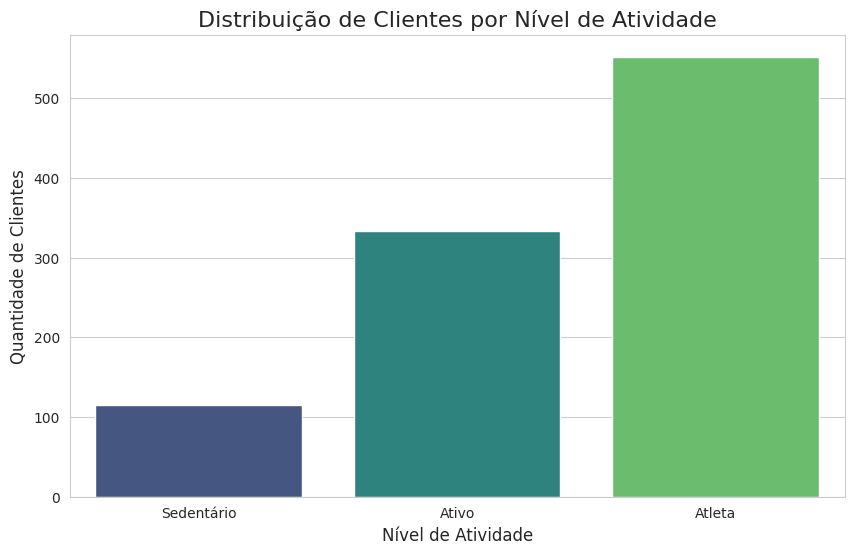

In [22]:
contagem_niveis = df_limpo['nivel_atividade'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_niveis.index, y=contagem_niveis.values, palette='viridis', order=['Sedentário', 'Ativo', 'Atleta'])

plt.title('Distribuição de Clientes por Nível de Atividade', fontsize=16)
plt.xlabel('Nível de Atividade', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)

plt.show()

# Gráfico de Pizza - Clientes com Acompanhamento Nutricional

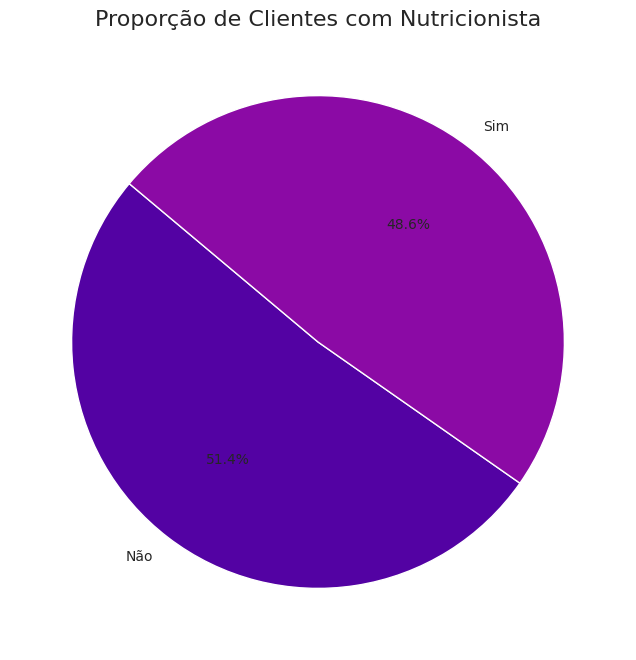

In [23]:
contagem_nutri = df_limpo['possui_nutricionista'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(contagem_nutri, labels=contagem_nutri.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('plasma'))

plt.title('Proporção de Clientes com Nutricionista', fontsize=16)
plt.ylabel('')

plt.show()

#Preparação dos Dados para o Modelo

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

X = df_limpo.drop(['nivel_atividade', 'data_matricula'], axis=1)
y = df_limpo['nivel_atividade']

X_encoded = pd.get_dummies(X, columns=['sexo', 'tipo_atividade', 'possui_nutricionista'], drop_first=True)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Features (X) prontas para o modelo:")
display(X_encoded.head())

print("\nTarget (y) codificado:")
print(y_encoded[:5])

Features (X) prontas para o modelo:


,idade,frequencia_semanal_treino,tempo_medio_exercicio,minutos_totais_semana,preco_plano,ultimo_PGC,evolucao_PGC,sexo_Masculino,sexo_Outro,tipo_atividade_Crossfit,tipo_atividade_Fut,tipo_atividade_Futebol,tipo_atividade_Musculação,tipo_atividade_Natacao,tipo_atividade_Natação,tipo_atividade_Soccer,tipo_atividade_Swimming,tipo_atividade_Yoga,possui_nutricionista_Sim
0,48,7.0,45.3,317.1,188.47,24.9,14.6,False,True,False,False,False,False,False,True,False,False,False,False
1,30,7.0,98.1,686.7,198.07,23.5,1.7,False,True,False,False,False,False,False,False,False,False,True,False
2,35,5.0,33.9,169.5,154.90,11.4,15.8,True,False,False,False,False,False,False,False,False,False,False,False
3,43,3.0,75.6,226.8,250.79,19.2,-4.8,False,True,False,False,False,False,False,False,False,False,True,True
4,37,0.0,114.0,0.0,168.02,18.1,3.4,True,False,True,False,False,False,False,False,False,False,False,True



Target (y) codificado:
[1 1 1 0 2]


#Divisão em Dados de Treino e Teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 700 amostras
Tamanho do conjunto de teste: 300 amostras


#Treinamento do Modelo

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


#Avaliação da Performance do Modelo

Acurácia do Modelo: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

       Ativo       1.00      1.00      1.00       100
      Atleta       1.00      1.00      1.00       166
  Sedentário       1.00      1.00      1.00        34

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Matriz de Confusão:


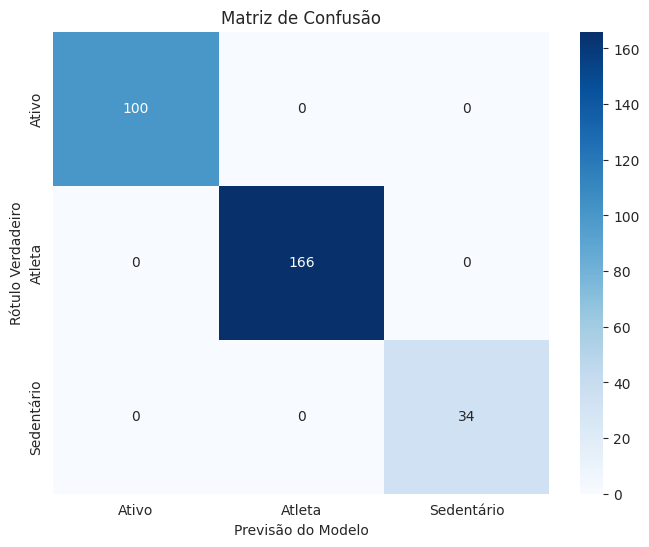

In [27]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2f}\n")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Previsão do Modelo')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()